In [1]:
import torch
import torch.nn as nn
from ImgDataLoader import DataSetLoader
from Model import UNetmodel
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor
from torch.utils import data
from time import time
import torch.optim as optim
import numpy as np
import Train
import Test
import Test_visiualization


In [2]:
start = time()
batch_size = 2
test_batch_size = 1
epochs = 30
lr = 0.0001
momentum = 0.05
cuda =  torch.cuda.is_available() and True

In [3]:
input_transform = Compose([
    
    ToTensor(),

])

target_transform = Compose([

    ToTensor(),
 
])

loader_train = data.DataLoader(DataSetLoader.DataSetLoader(r".\Data", train = True, mode = 'RGB',
                                    img_transform=input_transform,
                                    label_transform=target_transform,f='Train'),
                                batch_size = batch_size, shuffle=True, pin_memory=True)

loader_test = data.DataLoader(DataSetLoader.DataSetLoader(r".\Data", train = False, mode = 'RGB',
                                    img_transform=input_transform,
                                    label_transform=target_transform,f='Test'),
                                batch_size = test_batch_size, shuffle=True, pin_memory=True)


In [4]:
Unet = UNetmodel.UNet(num_classes=1, depth=2)
#Unet.load_state_dict(torch.load('./UnetModel/UnetD6/D6Trial1/PeanutTrial1Unet_30.pth'))
criterion = nn.BCEWithLogitsLoss()
#criterion = nn.MSELoss()
if cuda:
    Unet.cuda()
    criterion.cuda()
optimizer = optim.Adam(Unet.parameters(), lr = lr, betas=(0.9, 0.999), eps=1e-05)

 loss=0.01697291
torch.return_types.min(
values=tensor(0.0170),
indices=tensor(0))
==== Epoch Time ==== 38.52188181877136
epoch = 1
 loss=0.01188062
torch.return_types.min(
values=tensor(0.0119),
indices=tensor(1))
==== Epoch Time ==== 36.75625967979431
epoch = 2
 loss=0.01471204
torch.return_types.min(
values=tensor(0.0119),
indices=tensor(1))
==== Epoch Time ==== 37.035062313079834
epoch = 3
 loss=0.01785294
torch.return_types.min(
values=tensor(0.0119),
indices=tensor(1))
==== Epoch Time ==== 37.85007929801941
epoch = 4
 loss=0.01574849
torch.return_types.min(
values=tensor(0.0119),
indices=tensor(1))
==== Epoch Time ==== 37.274455070495605
epoch = 5
 loss=0.01339089
torch.return_types.min(
values=tensor(0.0119),
indices=tensor(1))
==== Epoch Time ==== 35.97636413574219
epoch = 6
 loss=0.01158801
torch.return_types.min(
values=tensor(0.0116),
indices=tensor(6))
==== Epoch Time ==== 36.48726534843445
epoch = 7
 loss=0.01192949
torch.return_types.min(
values=tensor(0.0116),
indices=te

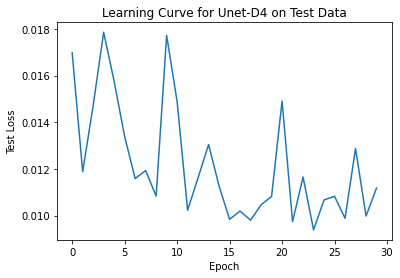

In [5]:
test_loss = torch.zeros(epochs+1)

for epoch in range(1, epochs+1):
    E_start = time()
    train_loss = Train.train(epoch,Unet=Unet,optimizer=optimizer,loader_train=loader_train,criterion=criterion)
    test_loss[epoch] = Test.test(Unet=Unet,loader_test=loader_test,criterion=criterion)
    print(test_loss[torch.nonzero(test_loss)[:,0]].min(0))
    E_stop = time()
    print('==== Epoch Time ====', str(E_stop - E_start))
    print("epoch = %d" %(epoch))
    
print(test_loss[1:].min(0))
np.savetxt('test_loss.txt', test_loss[1:].numpy())

plt.figure()
plt.title('Learning Curve for Unet-D4 on Test Data')
plt.plot(test_loss[1:].numpy())
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
stop = time()
print('==== Whole Time ====', str(stop-start))

torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
torch.Size([1, 3, 608, 968])
 loss=0.01118349


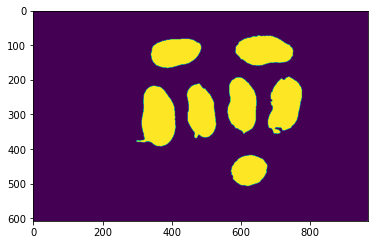

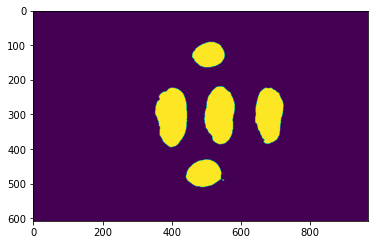

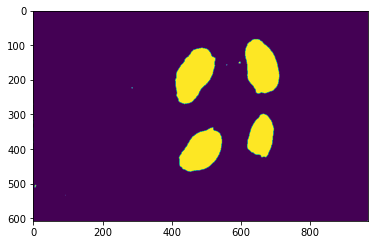

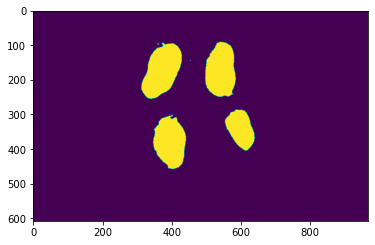

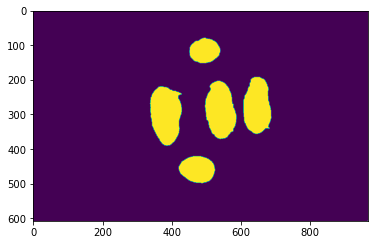

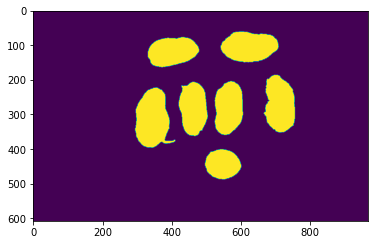

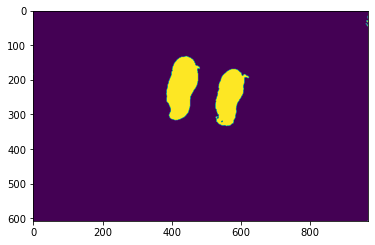

In [10]:
Test_visiualization.test_visiualization(Unet=Unet,loader_test=loader_test,criterion=criterion)